In [268]:
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Dense
import numpy as np

In [269]:
num_of_labels = 500
input_array = [x for x in range(num_of_labels)]

In [270]:
output_array = [(3*x+50) for x in range(num_of_labels)]

In [271]:
randomized_level = 20
noisy_array = []
#Add noise to the output array
for number in output_array:
    number = number + random.uniform(-randomized_level, randomized_level)
    noisy_array.append(number)
    pass

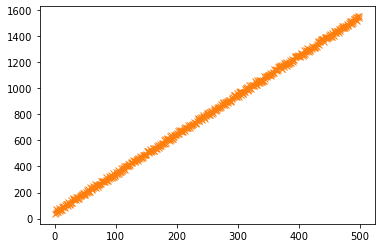

In [272]:
plt.plot(input_array, output_array)
plt.plot(input_array, noisy_array, 'x')
plt.show()

In [273]:
input_layer = Input(shape=(1))
regression_layer = Dense(units = 1)(input_layer)
my_model = tf.keras.Model(inputs = input_layer, outputs=regression_layer)
my_model.summary()


Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [274]:
my_model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), metrics = ['mae'], loss='mae')
input_array = tf.constant(input_array, dtype = 'float32')
noisy_array = tf.constant(noisy_array, dtype = 'float32')
my_model.fit(x = input_array, y = noisy_array, epochs = 40)

Epoch 1/40
16/16 [==============================] - 0s 3ms/step - loss: 1108.0746 - mae: 1108.0746
Epoch 2/40
16/16 [==============================] - 0s 4ms/step - loss: 1008.1088 - mae: 1008.1088
Epoch 3/40
16/16 [==============================] - 0s 3ms/step - loss: 908.8278 - mae: 908.8278
Epoch 4/40
16/16 [==============================] - 0s 4ms/step - loss: 808.7083 - mae: 808.7083
Epoch 5/40
16/16 [==============================] - 0s 4ms/step - loss: 709.4319 - mae: 709.4319
Epoch 6/40
16/16 [==============================] - 0s 4ms/step - loss: 610.3275 - mae: 610.3275
Epoch 7/40
16/16 [==============================] - 0s 4ms/step - loss: 510.5414 - mae: 510.5414
Epoch 8/40
16/16 [==============================] - 0s 6ms/step - loss: 410.8073 - mae: 410.8073
Epoch 9/40
16/16 [==============================] - 0s 5ms/step - loss: 311.2471 - mae: 311.2471
Epoch 10/40
16/16 [==============================] - 0s 4ms/step - loss: 211.7764 - mae: 211.7764
Epoch 11/40
16/16 [======

In [275]:
number = 25

test_input = tf.Variable(number, dtype=float)
test_input = tf.expand_dims(test_input, axis=0)

In [276]:
prediction = my_model(test_input)

In [277]:
print(prediction)

tf.Tensor([[78.66971]], shape=(1, 1), dtype=float32)


In [278]:
layers = my_model.layers

In [279]:
print(layers)

[<keras.engine.input_layer.InputLayer object at 0x000001EA705E9AE0>, <keras.layers.core.dense.Dense object at 0x000001EA45CABBB0>]


In [280]:
predictions = [x for x in range(num_of_labels)]
predictions = tf.Variable(predictions, dtype='float32')
predictions = tf.expand_dims(predictions, axis = -1)
print(predictions.shape)

(500, 1)


In [281]:
predictions = my_model(predictions) 

In [282]:
predictions = np.array(predictions)

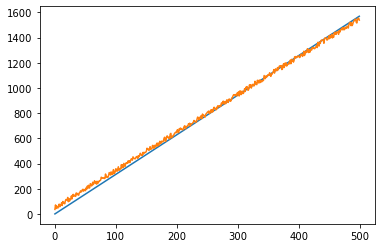

In [283]:
plt.plot(predictions)
plt.plot(noisy_array)
plt.show()